In [39]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'salesdata:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3697476%2F6525309%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T235901Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5340b76871fa5f3ae371d37b43ddd594ed750603b654f052c1400562e591a1f7f2292598b3be3879315b7a3040e68d1113ae88738cf87d2d58838be1aaf1c16a22724ac2eee9c73c3b22e1385f79abd1d7ae193732e662cb11225084ec3d376f02957ceaf324de974ba90d37651c403fc51e44cb529039ae45684de754c57185fe94f6f7e4849e862cd8559cc382e14e641b49306d1f87953751f737ecd62132fe039faa10ad4d61cdd738e72ece398a82c7cdec1acbf57e9b64bd1b698724fe9d29aedb6d4fc76d5f37599d4f3085d785db7e057d01201b68696862026dce394766c8ad7fbf72b53e7c32ff4deff3c5f67c81546108390279209a84df85dd17'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4795014 bytes downloaded
Downloaded and uncompressed: salesdata
Data source import complete.


In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salesdata/sales_data.csv


In [41]:
df = pd.read_csv('/kaggle/input/salesdata/sales_data.csv')

In [42]:
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [43]:
#Handle Null Values

In [44]:
df.isnull().sum()

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [45]:
#check data types of each feature and also check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [46]:
#Feature Engineering

In [47]:
#we split our date feature to month and year
df['Order Date'].head(1)

0    2019-01-22 21:25:00
Name: Order Date, dtype: object

In [48]:
df['Order Year']=df['Order Date'].str.split(' ').str[0].str.split('-').str[0]

In [49]:
df['Order Month']=df['Order Date'].str.split(' ').str[0].str.split('-').str[1]

In [50]:
#we  need only cities not all address
df['Purchase City']=df['Purchase Address'].str.split(',').str[1]

In [51]:
df['Purchase City'].value_counts()

Purchase City
 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: count, dtype: int64

In [52]:
#drop
df.drop(columns={'Order Date','Order ID','Product_ean','Purchase Address'},axis=1,inplace=True)

In [53]:
#Handle Number of Unique values

In [54]:
#there are many unique values we need to minimize this to smaller unique walues
df['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [55]:
#we make a def funtion to minimize our unique values to lower
def change(x):
    if x in ['USB-C Charging Cable','Lightning Charging Cable']:
        return 'Charging Cables'
    elif x in ['AAA Batteries (4-pack)','AA Batteries (4-pack)']:
        return 'Batteries'
    elif x in ['Wired Headphones','Apple Airpods Headphones','Bose SoundSport Headphones']:
        return 'Headphones'
    elif x in ['27in FHD Monitor','27in 4K Gaming Monitor','34in Ultrawide Monitor','Flatscreen TV','20in Monitor']:
        return 'Smart Tv'
    elif x in ['iPhone','Google Phone','Vareebadd Phone']:
        return 'Smart Phones'
    elif x in ['Macbook Pro Laptop','ThinkPad Laptop']:
        return 'Laptops'
    elif x in ['LG Washing Machine','LG Dryer']:
        return 'Cleaning Machines'
    else:
        return 'Others'

In [56]:
df['Product'] = df['Product'].apply(change)

In [57]:
df['Product'].value_counts()

Product
Headphones           47756
Charging Cables      43561
Batteries            41218
Smart Tv             28819
Smart Phones         14432
Laptops               8852
Cleaning Machines     1312
Name: count, dtype: int64

In [58]:
df.head(1)

,Product,catégorie,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City
0,Smart Phones,Vêtements,1,700.0,231.0,700.0,469.0,2019,01,Boston


In [59]:
#convert french language faeature to english for better understanding
df.rename(columns={'catégorie':'Category'},inplace=True)

In [60]:
df['Category'].value_counts()

Category
Sports          46925
Vêtements       46405
Alimentation    46342
Électronique    46278
Name: count, dtype: int64

In [61]:
#same as change fature data french to english for better understanding
data_mapping = {
    'Vêtements': 'Clothes',
    'Électronique': 'Electronics'
}
df['Category'] = df['Category'].map(data_mapping).fillna(df['Category'])

In [62]:
df['Category'].value_counts()

Category
Sports          46925
Clothes         46405
Alimentation    46342
Electronics     46278
Name: count, dtype: int64

In [63]:
#check data types of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Category          185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Cost price        185950 non-null  float64
 5   turnover          185950 non-null  float64
 6   margin            185950 non-null  float64
 7   Order Year        185950 non-null  object 
 8   Order Month       185950 non-null  object 
 9   Purchase City     185950 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 14.2+ MB


In [64]:
#convert float data to int for minimize our data to low
df['Order Month'] = df['Order Month'].astype(int)
df['Order Year'] = df['Order Year'].astype(int)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Category          185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Cost price        185950 non-null  float64
 5   turnover          185950 non-null  float64
 6   margin            185950 non-null  float64
 7   Order Year        185950 non-null  int64  
 8   Order Month       185950 non-null  int64  
 9   Purchase City     185950 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 14.2+ MB


In [66]:
df.head()

,Product,Category,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City
0,Smart Phones,Clothes,1,700.00,231.0000,700.00,469.0000,2019,1,Boston
1,Charging Cables,Alimentation,1,14.95,7.4750,14.95,7.4750,2019,1,Portland
2,Headphones,Clothes,2,11.99,5.9950,23.98,11.9900,2019,1,San Francisco
3,Smart Tv,Sports,1,149.99,97.4935,149.99,52.4965,2019,1,Los Angeles
4,Headphones,Electronics,1,11.99,5.9950,11.99,5.9950,2019,1,Austin


In [67]:
#Exploratary Data Analysis

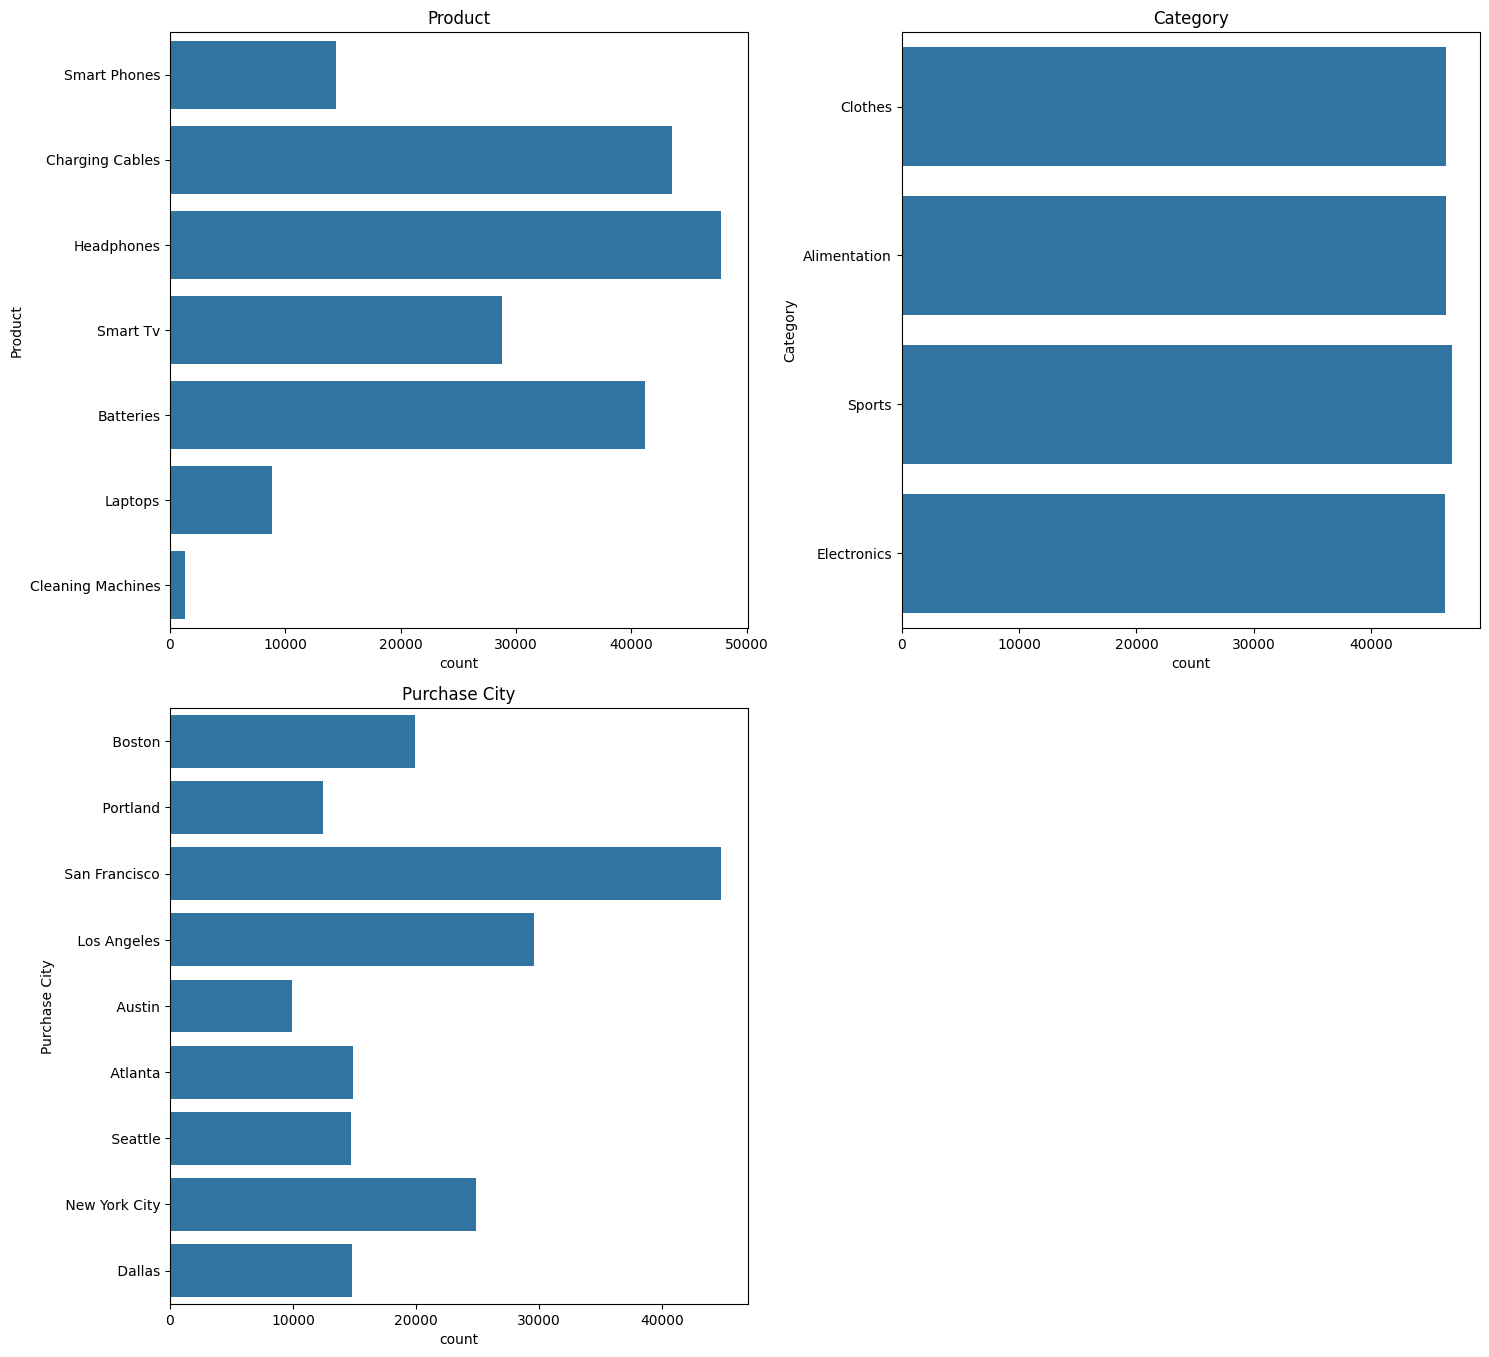

In [68]:
#exploratary data analysis on category features
cat = df.select_dtypes(include='object').columns.tolist()
col = len(cat)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i , var in enumerate (cat):
    sns.countplot(y=var,data=df,ax=axs[i])
    axs[i].set_title(var)

if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

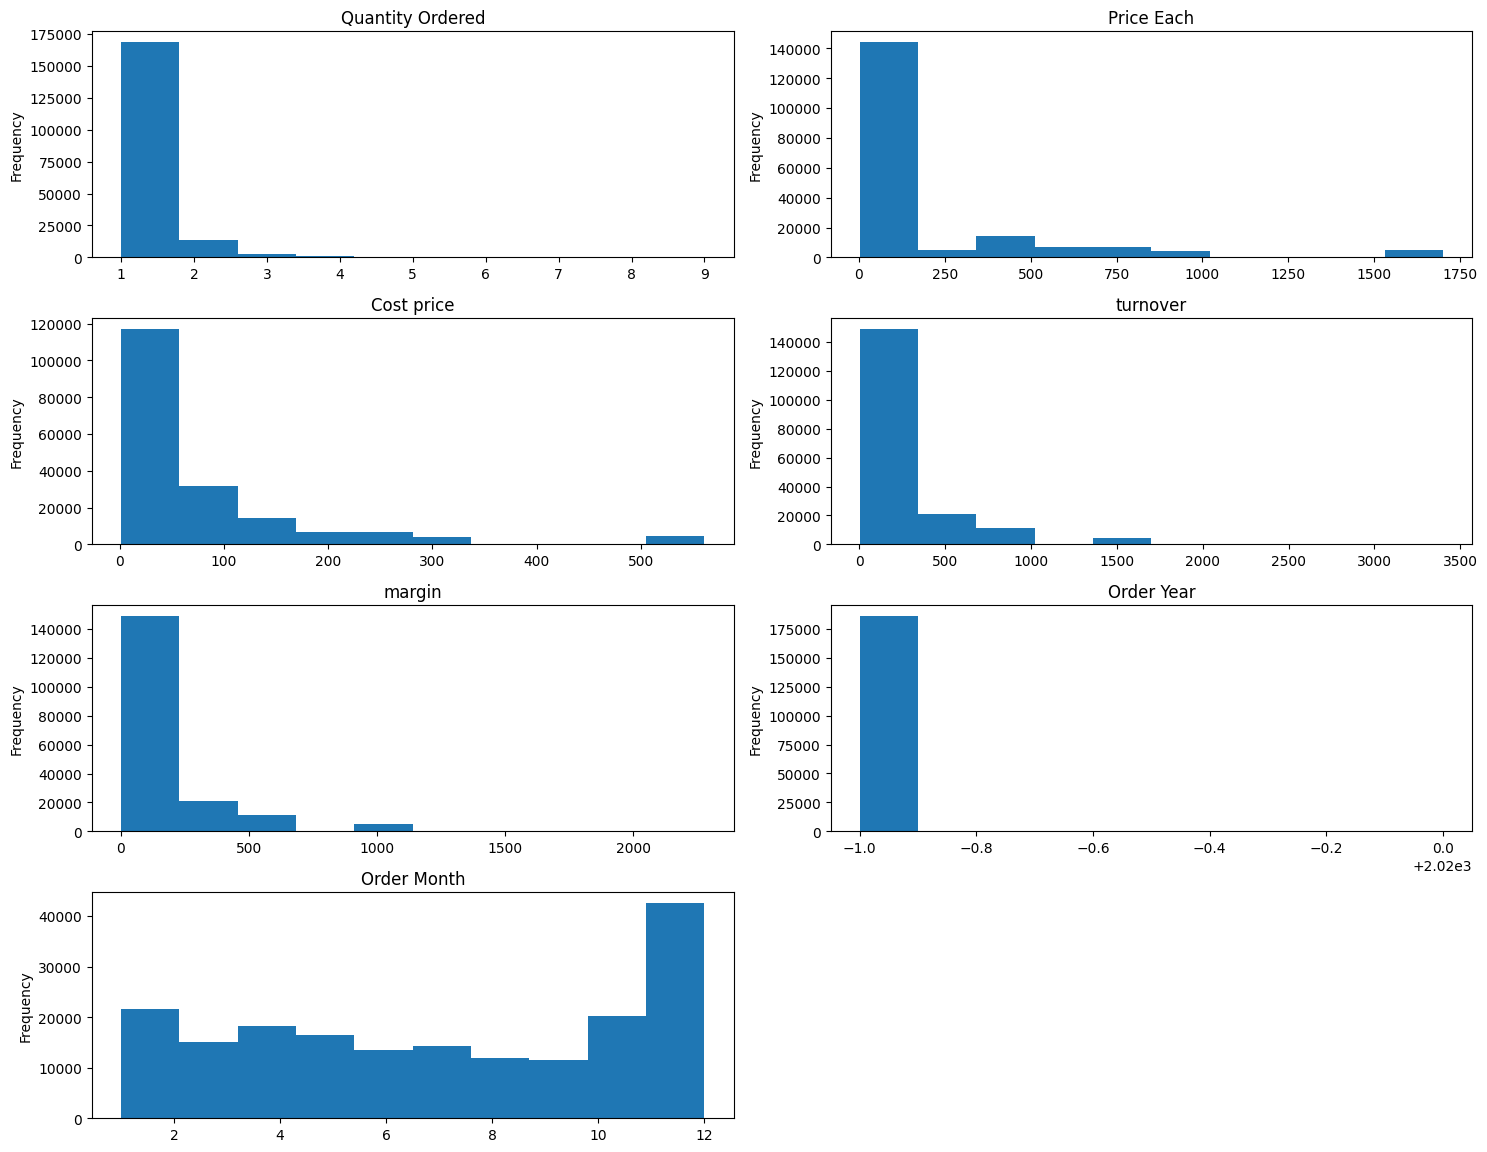

In [69]:
#exploratary data analysis on numerical or continuous features
num = df.select_dtypes(include=['int','float']).columns.tolist()
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i , var in enumerate (num):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

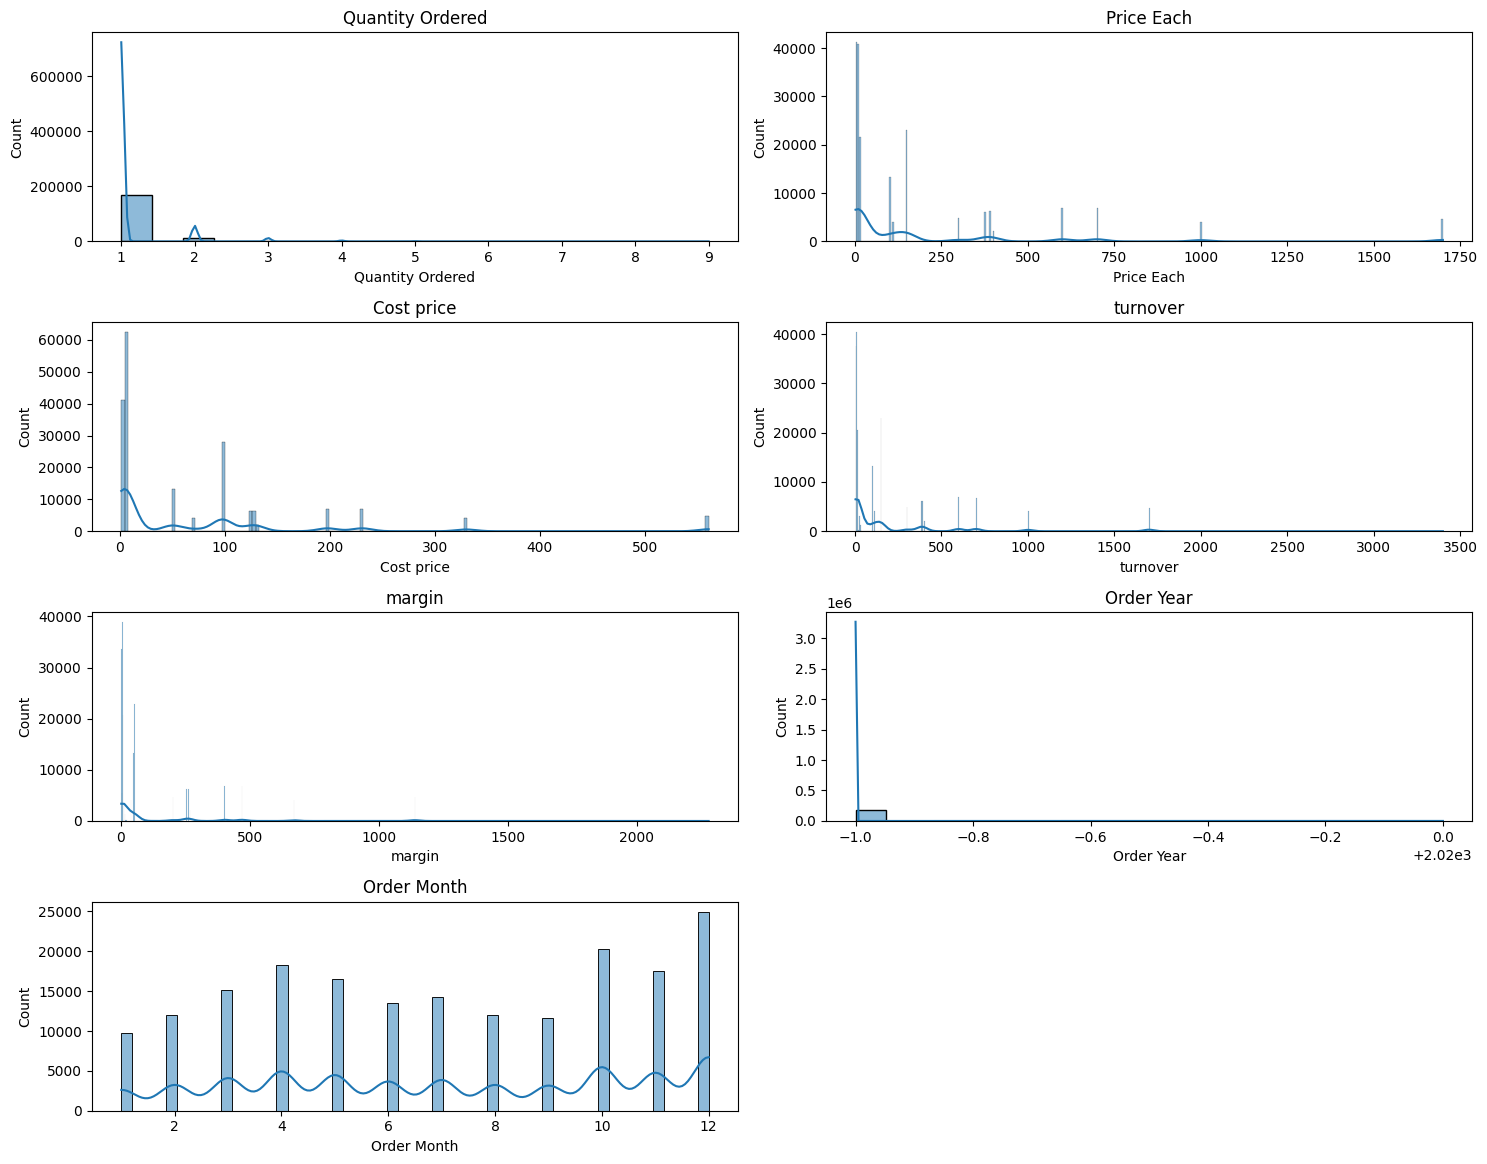

In [70]:
#exploratary data anaylsis with kde(kernal density estimation)
num = df.select_dtypes(include=['int','float']).columns.tolist()
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i , var in enumerate (num):
    sns.histplot(data=df,x=var,kde=True,ax=axs[i])
    axs[i].set_title(var)

if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

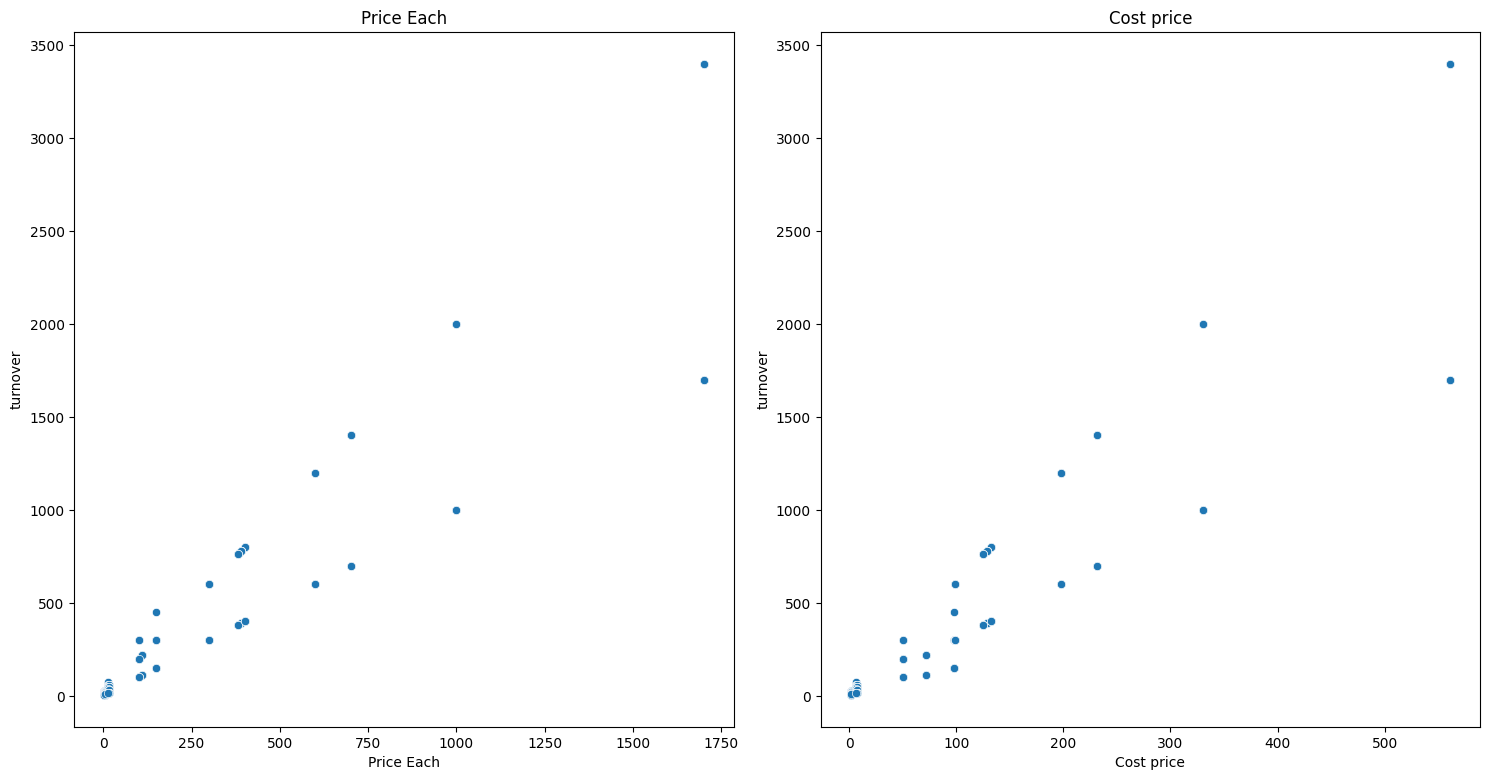

In [71]:
#using scatter plot to tells relation between 2 independent feature
num = ['Price Each','Cost price']
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i , var in enumerate (num):
    sns.scatterplot(x=var,y='turnover',data=df,ax=axs[i])
    axs[i].set_title(var)

if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

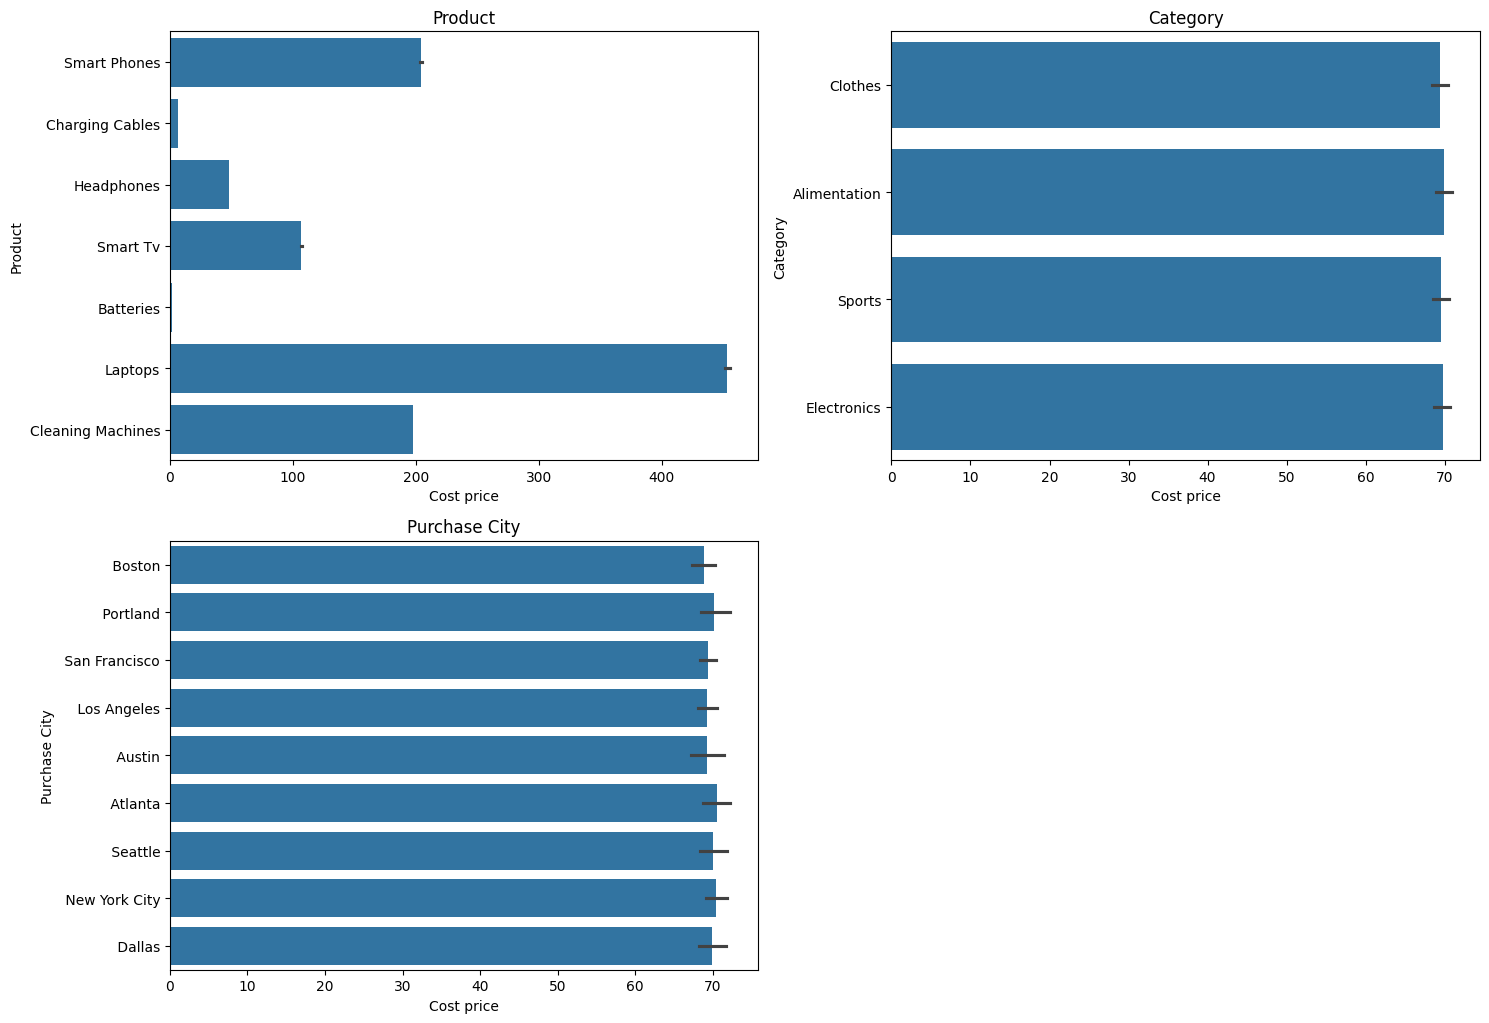

In [72]:
#eda using dependent feature cost price
cat = ['Product','Category','Purchase City']
col = len(cat)
fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (cat):
    sns.barplot(x='Cost price', y=var, data=df, ax=axs[i])
    axs[i].set_title(var)

if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

Building the ML Model

In [73]:
df.head()

,Product,Category,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City
0,Smart Phones,Clothes,1,700.00,231.0000,700.00,469.0000,2019,1,Boston
1,Charging Cables,Alimentation,1,14.95,7.4750,14.95,7.4750,2019,1,Portland
2,Headphones,Clothes,2,11.99,5.9950,23.98,11.9900,2019,1,San Francisco
3,Smart Tv,Sports,1,149.99,97.4935,149.99,52.4965,2019,1,Los Angeles
4,Headphones,Electronics,1,11.99,5.9950,11.99,5.9950,2019,1,Austin


In [74]:
df= df.drop('Category',axis=1)
df.head()

,Product,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City
0,Smart Phones,1,700.00,231.0000,700.00,469.0000,2019,1,Boston
1,Charging Cables,1,14.95,7.4750,14.95,7.4750,2019,1,Portland
2,Headphones,2,11.99,5.9950,23.98,11.9900,2019,1,San Francisco
3,Smart Tv,1,149.99,97.4935,149.99,52.4965,2019,1,Los Angeles
4,Headphones,1,11.99,5.9950,11.99,5.9950,2019,1,Austin


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Quantity Ordered  185950 non-null  int64  
 2   Price Each        185950 non-null  float64
 3   Cost price        185950 non-null  float64
 4   turnover          185950 non-null  float64
 5   margin            185950 non-null  float64
 6   Order Year        185950 non-null  int64  
 7   Order Month       185950 non-null  int64  
 8   Purchase City     185950 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 12.8+ MB


In [76]:
df['Product'].value_counts()

Product
Headphones           47756
Charging Cables      43561
Batteries            41218
Smart Tv             28819
Smart Phones         14432
Laptops               8852
Cleaning Machines     1312
Name: count, dtype: int64

In [77]:
#Getting Dummy Variables(One-hot-encoding)
df=pd.get_dummies(data=df,drop_first=True)
df.head()

,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Product_Charging Cables,Product_Cleaning Machines,Product_Headphones,...,Product_Smart Phones,Product_Smart Tv,Purchase City_ Austin,Purchase City_ Boston,Purchase City_ Dallas,Purchase City_ Los Angeles,Purchase City_ New York City,Purchase City_ Portland,Purchase City_ San Francisco,Purchase City_ Seattle
0,1,700.00,231.0000,700.00,469.0000,2019,1,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,1,14.95,7.4750,14.95,7.4750,2019,1,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2,11.99,5.9950,23.98,11.9900,2019,1,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,149.99,97.4935,149.99,52.4965,2019,1,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4,1,11.99,5.9950,11.99,5.9950,2019,1,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [79]:
y=df['margin']
X=df.drop('margin',axis=1)
X.head()

,Quantity Ordered,Price Each,Cost price,turnover,Order Year,Order Month,Product_Charging Cables,Product_Cleaning Machines,Product_Headphones,Product_Laptops,Product_Smart Phones,Product_Smart Tv,Purchase City_ Austin,Purchase City_ Boston,Purchase City_ Dallas,Purchase City_ Los Angeles,Purchase City_ New York City,Purchase City_ Portland,Purchase City_ San Francisco,Purchase City_ Seattle
0,1,700.00,231.0000,700.00,2019,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False
1,1,14.95,7.4750,14.95,2019,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,2,11.99,5.9950,23.98,2019,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,1,149.99,97.4935,149.99,2019,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,1,11.99,5.9950,11.99,2019,1,False,False,True,False,False,False,True,False,False,False,False,False,False,False


In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Quantity Ordered              185950 non-null  int64  
 1   Price Each                    185950 non-null  float64
 2   Cost price                    185950 non-null  float64
 3   turnover                      185950 non-null  float64
 4   Order Year                    185950 non-null  int64  
 5   Order Month                   185950 non-null  int64  
 6   Product_Charging Cables       185950 non-null  bool   
 7   Product_Cleaning Machines     185950 non-null  bool   
 8   Product_Headphones            185950 non-null  bool   
 9   Product_Laptops               185950 non-null  bool   
 10  Product_Smart Phones          185950 non-null  bool   
 11  Product_Smart Tv              185950 non-null  bool   
 12  Purchase City_ Austin         185950 non-nul

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Quantity Ordered,Price Each,Cost price,turnover,Order Year,Order Month,Product_Charging Cables,Product_Cleaning Machines,Product_Headphones,Product_Laptops,Product_Smart Phones,Product_Smart Tv,Purchase City_ Austin,Purchase City_ Boston,Purchase City_ Dallas,Purchase City_ Los Angeles,Purchase City_ New York City,Purchase City_ Portland,Purchase City_ San Francisco,Purchase City_ Seattle
142210,1,11.99,5.9950,11.99,2019,10,False,False,True,False,False,False,False,False,False,False,False,False,True,False
172951,1,11.99,5.9950,11.99,2019,12,False,False,True,False,False,False,False,False,False,False,False,False,False,False
147105,1,149.99,97.4935,149.99,2019,11,False,False,False,False,False,True,False,False,False,False,True,False,False,False
124056,1,389.99,128.6967,389.99,2019,10,False,False,False,False,False,True,False,False,False,False,False,False,True,False
22827,1,11.99,5.9950,11.99,2019,3,False,False,True,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,4,2.99,1.4950,11.96,2019,9,False,False,False,False,False,False,False,False,False,False,True,False,False,False
103694,1,150.00,97.5000,150.00,2019,8,False,False,True,False,False,False,False,False,False,False,False,False,True,False
131932,1,11.99,5.9950,11.99,2019,10,False,False,True,False,False,False,False,False,False,True,False,False,False,False
146867,1,2.99,1.4950,2.99,2019,11,False,False,False,False,False,False,False,False,False,False,False,True,False,False


Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [88]:
print(reg.score(X_test,y_test))

0.9999629024831777


In [89]:
X_test

,Quantity Ordered,Price Each,Cost price,turnover,Order Year,Order Month,Product_Charging Cables,Product_Cleaning Machines,Product_Headphones,Product_Laptops,Product_Smart Phones,Product_Smart Tv,Purchase City_ Austin,Purchase City_ Boston,Purchase City_ Dallas,Purchase City_ Los Angeles,Purchase City_ New York City,Purchase City_ Portland,Purchase City_ San Francisco,Purchase City_ Seattle
75632,1,99.99,49.9950,99.99,2019,6,False,False,True,False,False,False,False,False,False,False,False,False,True,False
30255,1,11.99,5.9950,11.99,2019,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False
86718,1,11.99,5.9950,11.99,2019,7,False,False,True,False,False,False,False,True,False,False,False,False,False,False
167590,1,389.99,128.6967,389.99,2019,12,False,False,False,False,False,True,False,False,False,False,True,False,False,False
41197,1,700.00,231.0000,700.00,2019,4,False,False,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180101,1,150.00,97.5000,150.00,2019,12,False,False,True,False,False,False,False,False,False,False,False,False,False,False
93903,1,150.00,97.5000,150.00,2019,7,False,False,True,False,False,False,False,False,False,True,False,False,False,False
68931,1,3.84,1.9200,3.84,2019,5,False,False,False,False,False,False,False,False,False,False,False,True,False,False
99168,1,999.99,329.9967,999.99,2019,7,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [90]:
y_test

75632      49.9950
30255       5.9950
86718       5.9950
167590    261.2933
41197     469.0000
            ...   
180101     52.5000
93903      52.5000
68931       1.9200
99168     669.9933
107380      1.9200
Name: margin, Length: 37190, dtype: float64